# Purchasers classification #
*by: Leonardo Vázquez Rodríguez*

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read the data and saved in a dataframe
df = pd.read_csv('Compras.csv')
DF = pd.DataFrame(df)
# Replace the values of Female and Male by 1 and 0, respectively
DF['Gender'].replace('Male',0,inplace=True)
DF['Gender'].replace('Female',1,inplace=True)

Male = 0  
Feamale = 1

In [3]:
DF

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


didn't buy = 0  
did buy = 1

$$ $$

In [4]:
DFF = DF
# deleted 'User ID' column because this column does not give any information to make the model
del DFF['User ID']
DFF

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [5]:
# Dataset values
Dataset = DFF.values
Dataset

array([[    0,    19, 19000,     0],
       [    0,    35, 20000,     0],
       [    1,    26, 43000,     0],
       ...,
       [    1,    50, 20000,     1],
       [    0,    36, 33000,     0],
       [    1,    49, 36000,     1]])

In [6]:
# Split the data in input and output, respectively
X = Dataset[:,0:3]
Y = Dataset[:,-1]

In [7]:
# Show how looks the input data
X

array([[    0,    19, 19000],
       [    0,    35, 20000],
       [    1,    26, 43000],
       ...,
       [    1,    50, 20000],
       [    0,    36, 33000],
       [    1,    49, 36000]])

In [8]:
# To transform features by scaling each feature to given a range between zero and one
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaler_ = min_max_scaler.fit_transform(X)
X_scaler_

array([[0.        , 0.02380952, 0.02962963],
       [0.        , 0.4047619 , 0.03703704],
       [1.        , 0.19047619, 0.20740741],
       ...,
       [1.        , 0.76190476, 0.03703704],
       [0.        , 0.42857143, 0.13333333],
       [1.        , 0.73809524, 0.15555556]])

In [9]:
# Keep the same seed
np.random.seed(2)
# To split the data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler_,Y,test_size=0.3)

In [10]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
# Model corel
model = Sequential([
    Dense(32, activation = 'relu', input_shape=(3,)),
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Optimize the model
# sgd = stochastic gradient descend
model.compile(optimizer = 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [13]:
Model_train = model.fit(X_train, Y_train, batch_size=32, epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/9 [==>...........................] - ETA: 3s - loss: 0.6945 - accuracy: 0.4375WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f89db1d00e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and at

9/9 [==============================] - 0s 6ms/step - loss: 0.1979 - accuracy: 0.9324 - val_loss: 0.2677 - val_accuracy: 0.9167
Epoch 47/50
9/9 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.9189 - val_loss: 0.2671 - val_accuracy: 0.9167
Epoch 48/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.8888 - val_loss: 0.2828 - val_accuracy: 0.9083
Epoch 49/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9196 - val_loss: 0.2708 - val_accuracy: 0.9083
Epoch 50/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2152 - accuracy: 0.9054 - val_loss: 0.2724 - val_accuracy: 0.9083


In [14]:
# model evaluate
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2724 - accuracy: 0.9083


[0.27235254645347595, 0.9083333611488342]

In [15]:
X_test

array([[1.        , 0.26190476, 0.5037037 ],
       [1.        , 0.07142857, 0.00740741],
       [0.        , 0.45238095, 0.28148148],
       [0.        , 0.26190476, 0.44444444],
       [0.        , 0.85714286, 0.40740741],
       [0.        , 0.69047619, 0.03703704],
       [1.        , 0.11904762, 0.4962963 ],
       [0.        , 0.23809524, 0.12592593],
       [1.        , 0.52380952, 0.33333333],
       [1.        , 0.42857143, 0.82222222],
       [0.        , 0.14285714, 0.05925926],
       [1.        , 0.0952381 , 0.08888889],
       [1.        , 0.33333333, 0.75555556],
       [0.        , 0.64285714, 0.47407407],
       [0.        , 0.4047619 , 0.32592593],
       [0.        , 0.35714286, 0.20740741],
       [0.        , 0.02380952, 0.40740741],
       [0.        , 1.        , 0.2       ],
       [0.        , 0.83333333, 0.42222222],
       [1.        , 0.19047619, 0.20740741],
       [1.        , 0.45238095, 0.46666667],
       [1.        , 0.64285714, 0.22222222],
       [1.

In [16]:
# Save the model predictions
Y_predict=model.predict(X_test).flatten()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [17]:
Y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [18]:
# Transform the prediction values between 0 and 1
Y_p = Y_predict
Y_p=np.where(Y_p<0.5,0,Y_p)
Y_p=np.where(Y_p>=0.5,1,Y_p)
Y_p

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0.], dtype=float32)

In [19]:
from sklearn.metrics import confusion_matrix
# Model confusion matrix
cm = confusion_matrix(Y_test, Y_p)
cm

array([[72,  5],
       [ 6, 37]])

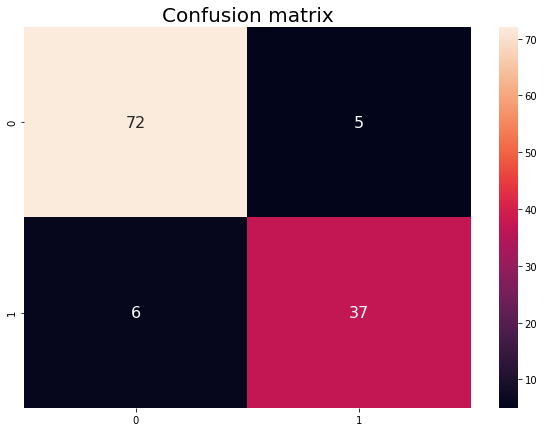

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.title('Confusion matrix', size=20)
plt.show()